In [125]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

The following is a project on highlighting various companies than are hiring for roles in the Data Industry using seaborn and plotly express for interactive charts.

In [126]:
data = pd.read_csv(r"C:\Users\anasw\OneDrive\Desktop\Datasets\Data-Science-Job_Listing.csv")
df = pd.DataFrame(data)

df.head()

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6


In [127]:
df.columns

Index(['Position', 'Job Title', 'Company Name', 'Location', 'Salary', 'Date',
       'Logo', 'Job Link', 'Company Rating'],
      dtype='object')

In [128]:
df.isnull().sum()

Position           0
Job Title          0
Company Name       0
Location           0
Salary            62
Date               0
Logo              64
Job Link           0
Company Rating    61
dtype: int64

In [129]:
df.shape

(500, 9)

In [130]:

df["Company Rating"].fillna(df["Company Rating"].mode()[0], inplace = True)

C:\Users\anasw\AppData\Local\Temp\ipykernel_15432\549796305.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  500 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [132]:
df["Job Title"].value_counts().head(20)

Job Title
Data Scientist                                                                             24
Senior Data Scientist                                                                      17
Senior Manager Data Science                                                                 8
Principal Data Science                                                                      8
Field Data Collector (PPC)                                                                  7
Data Analyst                                                                                7
Senior Associate, Data Science - Retail Bank                                                5
Senior Data Science Analyst                                                                 5
Senior Product Manager, Generalist - Remote                                                 5
Data Engineer (PO)                                                                          5
Engineer, Generative AI                           

In [133]:
df[(df["Job Title"] == "Junior Data Scientist") | (df["Job Title"] == "Associate Data Scientist")]


,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating


In [134]:
df["Company Name"].value_counts()

Company Name
Discover Financial Services\n3.9    31
Inizio Engage\n3.6                  18
Freddie Mac\n3.6                    12
NVIDIA\n4.6                          9
Kforce\n3.8                          7
                                    ..
Tosca Services, LLC\n3.2             1
Gohagan & Company                    1
YouTube\n4.4                         1
cBEYONData\n4.8                      1
Sciome LLC                           1
Name: count, Length: 259, dtype: int64

In [135]:
df["Company Name"].value_counts()

Company Name
Discover Financial Services\n3.9    31
Inizio Engage\n3.6                  18
Freddie Mac\n3.6                    12
NVIDIA\n4.6                          9
Kforce\n3.8                          7
                                    ..
Tosca Services, LLC\n3.2             1
Gohagan & Company                    1
YouTube\n4.4                         1
cBEYONData\n4.8                      1
Sciome LLC                           1
Name: count, Length: 259, dtype: int64

In [136]:
top10_location = df["Location"].value_counts().head(10)
top10_L = pd.DataFrame(top10_location)

top10_L = top10_L.reset_index()

top10_L

,Location,count
0,Remote,41
1,"Riverwoods, IL",31
2,"New York, NY",22
3,United States,20
4,"McLean, VA",16
5,"Washington, DC",12
6,"Atlanta, GA",12
7,"Seattle, WA",11
8,"Irving, TX",10
9,"Santa Clara, CA",9


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = px.bar(top10_L, x='Location', y='count', color='Location',
             labels={'Number of Jobs': 'Number of Jobs', 'Location': 'Location'},
             title='Number of Jobs by Location')

# Update the layout for better visualization
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


In [138]:
top10_salary = df["Salary"].value_counts().head(10)
top10_S = pd.DataFrame(top10_salary)

top10_S = top10_S.reset_index()

top10_S

,Salary,count
0,$127K - $177K (Employer est.),12
1,$150K - $210K (Employer est.),8
2,$20.00 Per Hour (Employer est.),7
3,$62K - $107K (Employer est.),6
4,$86K - $120K (Employer est.),5
5,$45.00 Per Hour (Employer est.),5
6,$150K - $190K (Employer est.),5
7,$180K - $339K (Employer est.),5
8,$160K - $190K (Employer est.),5
9,$55.00 - $60.00 Per Hour (Employer est.),5


In [139]:
fig = px.bar(top10_S,y = 'Salary' , x = 'count',color='Salary' ,orientation='h',
             labels={'x': 'Salary', 'y': 'Job Title'},
             title='Top 10 Salaries offered')

fig.update_layout(width=800, height=800)

fig.show()


In [140]:
top_10_companies = df["Company Name"].value_counts().head(15)

top_10C = pd.DataFrame(top_10_companies)
top_10C = top_10C.reset_index()

top_10C

,Company Name,count
0,Discover Financial Services\n3.9,31
1,Inizio Engage\n3.6,18
2,Freddie Mac\n3.6,12
3,NVIDIA\n4.6,9
4,Kforce\n3.8,7
5,Aquent\n4.0,7
6,Mathematica Policy Research\n3.9,7
7,Newark Board of Education\n3.3,7
8,Dropbox\n4.4,6
9,Capital One\n3.9,6


In [141]:
fig = px.bar(top_10C, x='Company Name', y='count', color='Company Name',
             labels={'x': 'Company Name', 'y': 'Number of listings'},
             title='Top 10 Companies with highest number of listings')

fig.update_layout(width=800, height=800)

fig.show()

In [142]:
less_than_avg = df[df["Company Rating"] <= 3.8]

greater_than_avg = df[df["Company Rating"] > 3.8]

In [143]:
less_than_avg.count()

Position          220
Job Title         220
Company Name      220
Location          220
Salary            196
Date              220
Logo              217
Job Link          220
Company Rating    220
dtype: int64

In [144]:

greater_than_avg.count()

Position          280
Job Title         280
Company Name      280
Location          280
Salary            242
Date              280
Logo              219
Job Link          280
Company Rating    280
dtype: int64

In [145]:
mean_rating = df["Company Rating"].max() - df["Company Rating"].min()

In [146]:
greater_than_mean = df[df["Company Rating"] > mean_rating]

In [147]:
less_than_mean = df[df["Company Rating"] < mean_rating]

In [148]:
greater_than_mean["Company Name"].value_counts()

Company Name
NVIDIA\n4.6                                                    9
Dropbox\n4.4                                                   6
Boston Consulting Group\n4.2                                   5
Booz Allen\n4.2                                                5
Optimizely\n4.1                                                4
CarShield\n4.5                                                 4
Genmab\n4.3                                                    3
Procter & Gamble\n4.1                                          3
Openwork, LLC\n5.0                                             3
CACI\n4.1                                                      3
Amex\n4.1                                                      3
Navy Federal Credit Union\n4.1                                 3
Johnson & Johnson\n4.2                                         2
Noblis\n4.6                                                    2
Microsoft\n4.3                                                 2
Network Cove

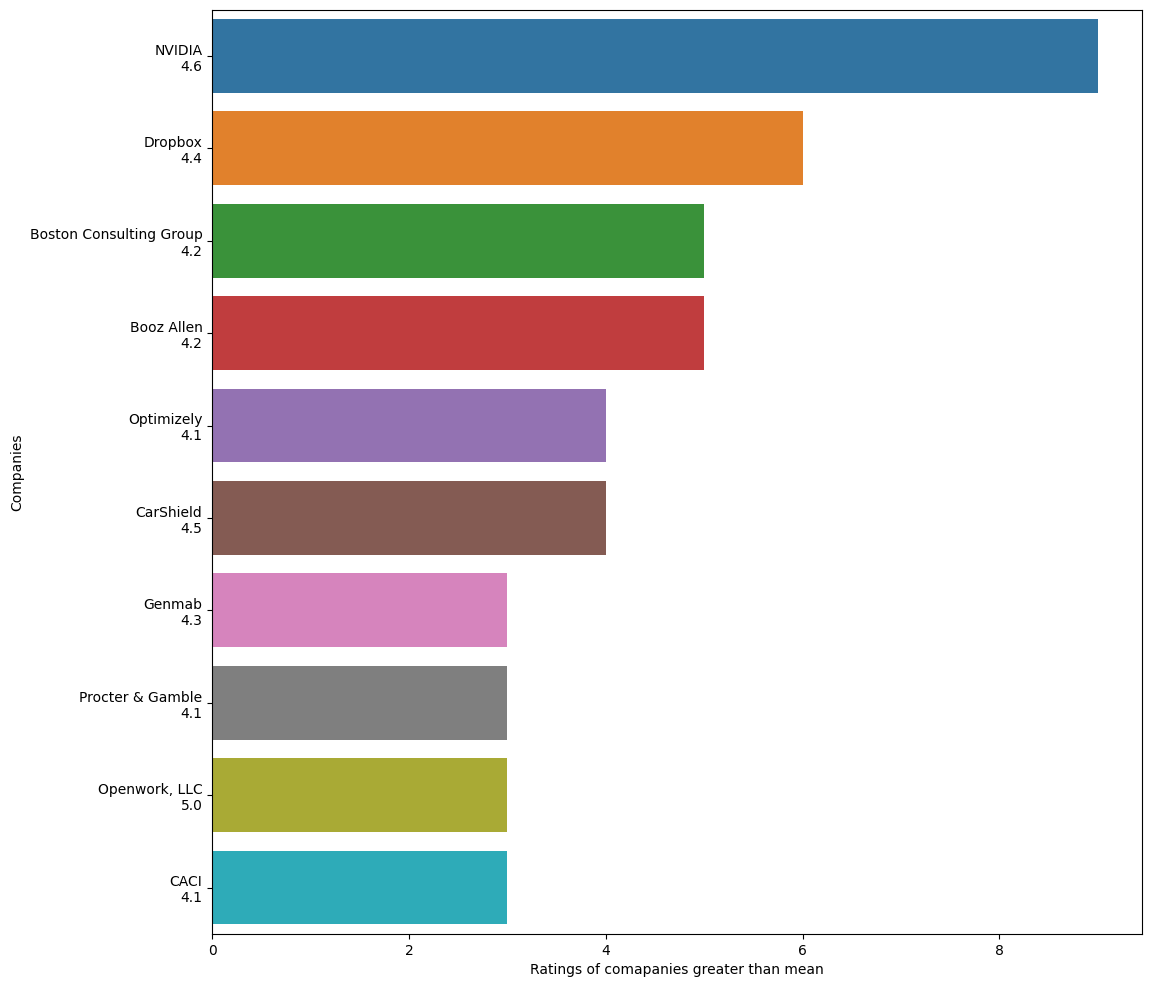

In [149]:
plt.figure(figsize=(12,12))
sns.barplot(y = greater_than_mean["Company Name"].value_counts().head(10).index , x = greater_than_mean["Company Name"].value_counts().head(10) , hue = greater_than_mean["Company Name"].value_counts().head(10).index)
plt.xlabel("Ratings of comapanies greater than mean")
plt.ylabel("Companies")
plt.show()

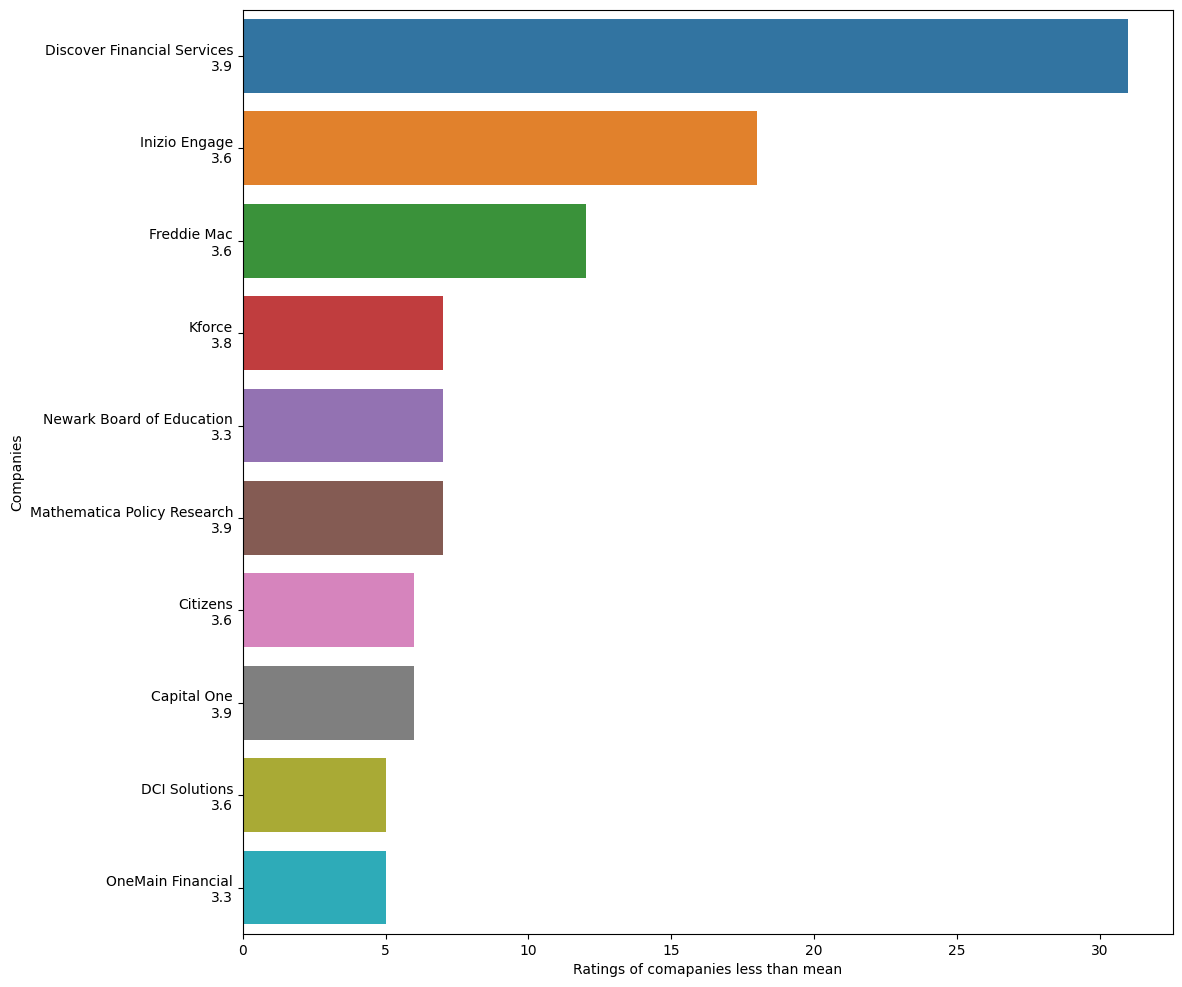

In [150]:
plt.figure(figsize=(12,12))
sns.barplot(y = less_than_mean["Company Name"].value_counts().head(10).index , x = less_than_mean["Company Name"].value_counts().head(10) , hue = less_than_mean["Company Name"].value_counts().head(10).index)
plt.xlabel("Ratings of comapanies less than mean")
plt.ylabel("Companies")
plt.show()